In [1]:
!pip install pandas

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.ensemble import IsolationForest

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv('records_v2.csv')

In [7]:
print(df.head())

    id  reading      reading_time  Fuel Volume (L)
0  1.0    23.02  11/20/2025 17:17            12.63
1  2.0    23.22  11/20/2025 17:17            12.46
2  3.0    23.22  11/20/2025 17:18            12.46
3  4.0    23.22  11/20/2025 17:18            12.46
4  5.0    23.22  11/20/2025 17:18            12.46


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1225 non-null   float64
 1   reading          1223 non-null   float64
 2   reading_time     1225 non-null   object 
 3   Fuel Volume (L)  1222 non-null   float64
dtypes: float64(3), object(1)
memory usage: 38.5+ KB
None


In [15]:
print(df.describe())

                id      reading  Fuel Volume (L)
count  1225.000000  1223.000000      1222.000000
mean    606.946122    28.101635         8.282300
std     345.994669     3.496746         2.991819
min       1.000000    22.860000         0.000000
25%     307.000000    25.380000         7.130000
50%     613.000000    28.760000         7.720000
75%     905.000000    29.450000        10.610000
max    1201.000000    37.780000        12.780000


In [16]:
print(df.isnull().sum())

id                 3
reading            5
reading_time       3
Fuel Volume (L)    6
dtype: int64


In [8]:
df['reading_time'] = pd.to_datetime(df['reading_time'])

In [9]:
df = df.sort_values('reading_time')

In [10]:
df.dropna(subset=['Fuel Volume (L)', 'reading', 'reading_time'], inplace=True)

In [11]:
df = df.sort_values('reading_time')

In [12]:
df['volume_diff'] = df['Fuel Volume (L)'].diff()

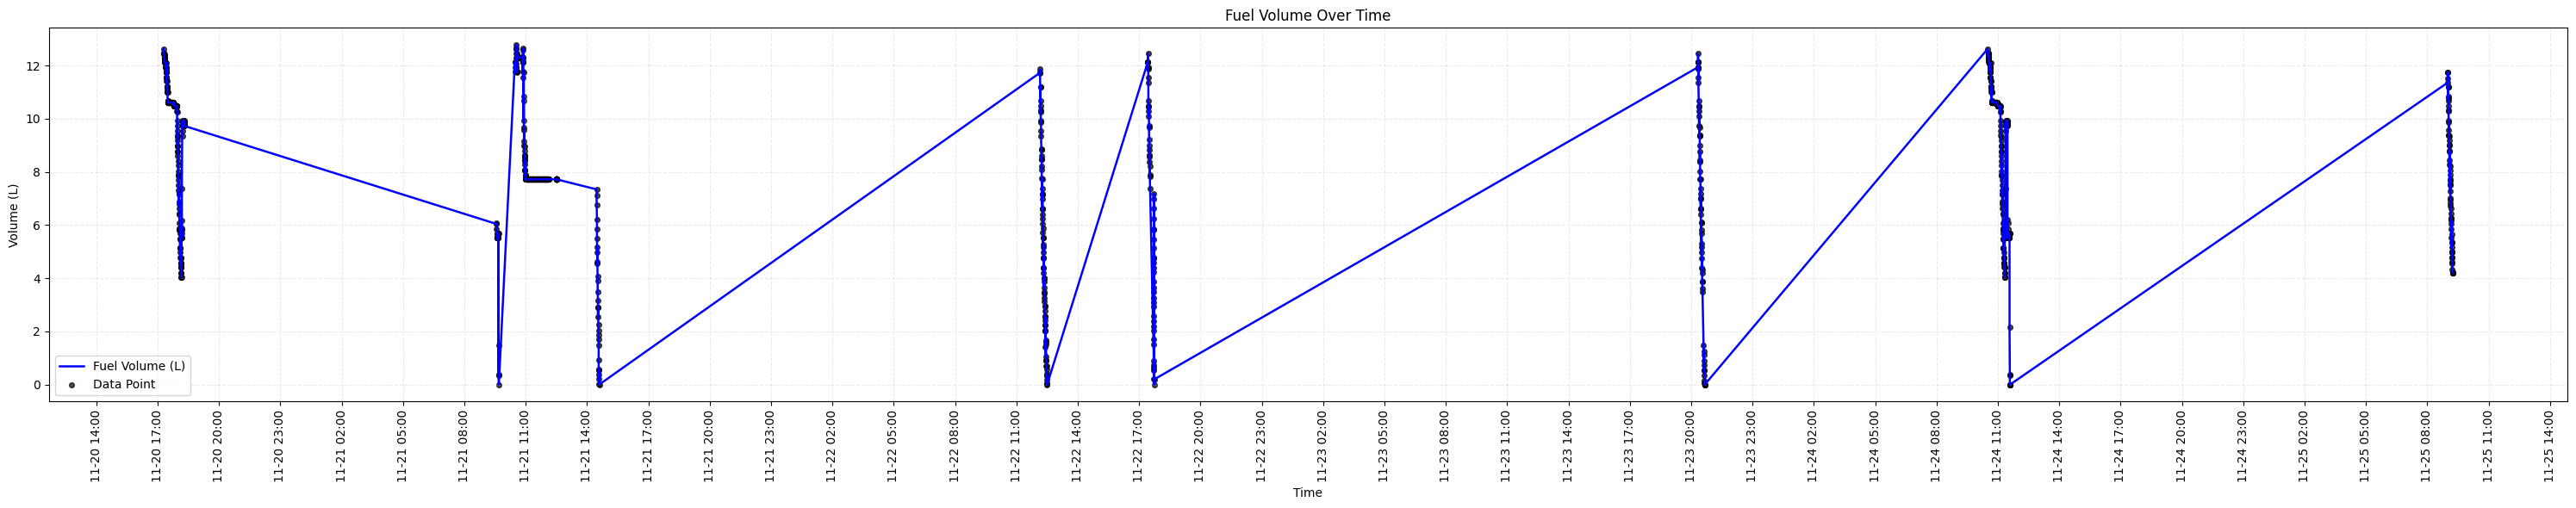

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(30, 6))  # Wider for dense time axis

# Scatter and line for clarity
plt.plot(df['reading_time'], df['Fuel Volume (L)'], color='blue', label='Fuel Volume (L)', linewidth=1.8)
plt.scatter(df['reading_time'], df['Fuel Volume (L)'], color='black', s=17, label='Data Point', alpha=0.7)

plt.title('Fuel Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume (L)')
plt.legend()

# Major ticks every 3 hours, show hour+minute+date
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', alpha=0.25)
plt.tight_layout()

plt.show()

In [23]:
df['volume_diff'] = df['Fuel Volume (L)'].diff()

In [24]:
print(df)

          id  reading        reading_time  Fuel Volume (L)  volume_diff
0        1.0    23.02 2025-11-20 17:17:00            12.63          NaN
1        2.0    23.22 2025-11-20 17:17:00            12.46        -0.17
2        3.0    23.22 2025-11-20 17:18:00            12.46         0.00
3        4.0    23.22 2025-11-20 17:18:00            12.46         0.00
4        5.0    23.22 2025-11-20 17:18:00            12.46         0.00
...      ...      ...                 ...              ...          ...
1220  1197.0    32.84 2025-11-25 09:14:00             4.23        -0.10
1221  1198.0    32.86 2025-11-25 09:14:00             4.21        -0.02
1222  1199.0    32.86 2025-11-25 09:14:00             4.21         0.00
1223  1200.0    32.86 2025-11-25 09:14:00             4.21         0.00
1224  1201.0    32.86 2025-11-25 09:15:00             4.21         0.00

[1222 rows x 5 columns]


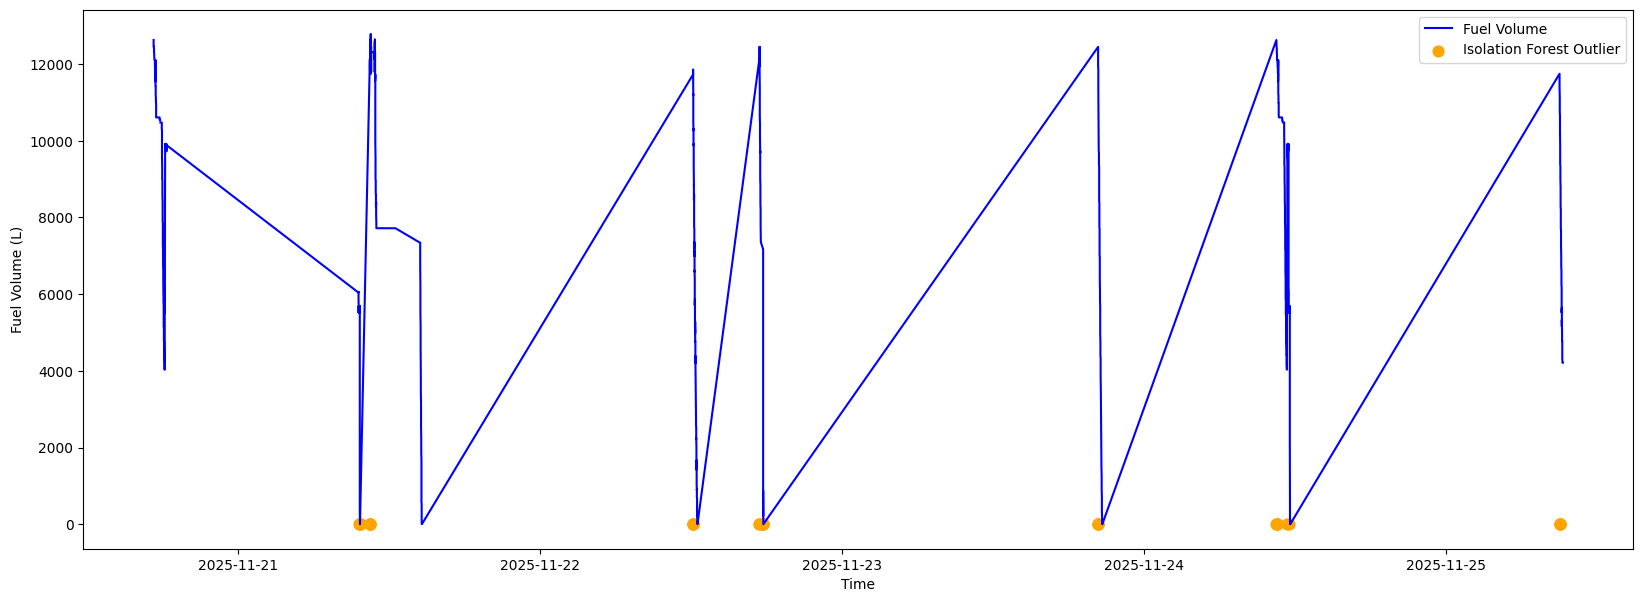

In [61]:
# =========================
# 6. Plot fuel volume with Isolation Forest anomalies
# =========================
plt.figure(figsize=(20, 7))

# Full fuel volume curve
plt.plot(df['reading_time'], df['Fuel Volume (L)'],
         label='Fuel Volume', color='blue')

# Highlight anomalies from multivariate Isolation Forest
plt.scatter(anomalies['reading_time'], anomalies['Fuel Volume (L)'],
            color='orange', s=60, label='Isolation Forest Outlier')

plt.xlabel('Time')
plt.ylabel('Fuel Volume (L)')
plt.legend()
plt.show()


In [19]:
# 1. Load and basic parsing
df = pd.read_csv("records_v2.csv")

df["Fuel Volume (L)"] = pd.to_numeric(df["Fuel Volume (L)"], errors="coerce")
df["reading_time"]   = pd.to_datetime(df["reading_time"], errors="coerce")
df = df.sort_values(["reading_time", "id"])

# 2. Scale volume to realistic station values
SCALE = 1000.0      # multiply all volumes by 1000
df["Fuel Volume (L)"] = df["Fuel Volume (L)"] * SCALE

# 3. Recompute features based on the scaled volume
df["volume_diff"]      = df["Fuel Volume (L)"].diff()
df["prev_fuel_volume"] = df["Fuel Volume (L)"].shift(1)

# 4. Feature matrix for model training
feature_cols = ["volume_diff"]   # you may also include prev_fuel_volume etc.
X = df[feature_cols].dropna()


In [20]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.04, random_state=42)
iso.fit(X)                       # learn "normal" behaviour
df.loc[X.index, 'iso_flag'] = iso.predict(X)   # 1 = normal, -1 = anomaly




In [21]:
# Refill immediately after empty tank -> treat as normal even if model said anomaly
legit_refill = (df['prev_fuel_volume'] == 0) & (df['volume_diff'] > 2)
df.loc[legit_refill, 'iso_flag'] = 1


In [22]:
iso_anomalies = df[df['iso_flag'] == -1][['id','reading_time','Fuel Volume (L)',
                                          'volume_diff','prev_fuel_volume']]
print(iso_anomalies)


          id        reading_time  Fuel Volume (L)  volume_diff  \
33      34.0 2025-11-20 17:26:00          12100.0        560.0   
34      35.0 2025-11-20 17:26:00          11420.0       -680.0   
200    201.0 2025-11-20 18:10:00           5520.0       1490.0   
202    203.0 2025-11-20 18:10:00           6160.0        470.0   
206    207.0 2025-11-20 18:11:00           7370.0       1540.0   
207    208.0 2025-11-20 18:12:00           9360.0       1990.0   
208    209.0 2025-11-20 18:12:00           9730.0        370.0   
210    211.0 2025-11-20 18:12:00           9890.0        340.0   
232    233.0 2025-11-21 09:34:00           6040.0      -3850.0   
255    256.0 2025-11-21 09:40:00           1480.0      -4190.0   
256    257.0 2025-11-21 09:40:00            370.0      -1110.0   
265    266.0 2025-11-21 10:31:00          12640.0        330.0   
270    271.0 2025-11-21 10:32:00          12780.0        830.0   
271    272.0 2025-11-21 10:32:00          11950.0       -830.0   
275    276

In [34]:
import numpy as np

# Make sure volume_diff and prev_fuel_volume exist
df['volume_diff'] = df['Fuel Volume (L)'].diff()
df['prev_fuel_volume'] = df['Fuel Volume (L)'].shift(1)

def classify_anomaly(row, big_jump=2000.0):
    if row['iso_flag'] != -1:      # normal points
        return np.nan
    if row['volume_diff'] <= -big_jump:
        return 'Sudden large drop'
    elif row['volume_diff'] >= big_jump and row['prev_fuel_volume'] != 0:
        return 'Unexpected refill'
    elif abs(row['volume_diff']) < big_jump and row['prev_fuel_volume'] != 0:
        return 'Unusual small change'
    else:
        return 'Refill after empty / ignore'

df['anomaly_type'] = df.apply(classify_anomaly, axis=1)


In [35]:
import pandas as pd

# Ensure df is sorted correctly
df = df.sort_values(['reading_time', 'id']).reset_index(drop=True)

# Get indices of anomaly points
anomaly_idx = df.index[df['iso_flag'] == -1]  # or 'svm_flag'

records_list = []

for i in anomaly_idx:
    prev_row = df.iloc[i-1] if i-1 >= 0 else None
    curr_row = df.iloc[i]
    next_row = df.iloc[i+1] if i+1 < len(df) else None

    if prev_row is not None:
        records_list.append({
            'relation': 'Previous',
            'anomaly_id': curr_row['id'],
            'id': prev_row['id'],
            'reading_time': prev_row['reading_time'],
            'Fuel Volume (L)': prev_row['Fuel Volume (L)']
        })

    records_list.append({
        'relation': 'Anomaly',
        'anomaly_id': curr_row['id'],
        'id': curr_row['id'],
        'reading_time': curr_row['reading_time'],
        'Fuel Volume (L)': curr_row['Fuel Volume (L)']
    })

    if next_row is not None:
        records_list.append({
            'relation': 'Next',
            'anomaly_id': curr_row['id'],
            'id': next_row['id'],
            'reading_time': next_row['reading_time'],
            'Fuel Volume (L)': next_row['Fuel Volume (L)']
        })

context_df = pd.DataFrame(records_list)

# Set custom order for relation and sort
relation_order = pd.CategoricalDtype(
    categories=['Previous', 'Anomaly', 'Next'],
    ordered=True
)
context_df['relation'] = context_df['relation'].astype(relation_order)

context_df = context_df.sort_values(['anomaly_id', 'relation'])
print(context_df)

def highlight_anomaly(row):
    styles = [''] * len(row)
    if row['relation'] == 'Anomaly':
        for i in range(len(row)):
            styles[i] = 'background-color: yellow; color: black;'
    return styles

context_df.style.apply(highlight_anomaly, axis=1)




     relation  anomaly_id      id        reading_time  Fuel Volume (L)
0    Previous        34.0    33.0 2025-11-20 17:26:00          11540.0
1     Anomaly        34.0    34.0 2025-11-20 17:26:00          12100.0
2        Next        34.0    35.0 2025-11-20 17:26:00          11420.0
3    Previous        35.0    34.0 2025-11-20 17:26:00          12100.0
4     Anomaly        35.0    35.0 2025-11-20 17:26:00          11420.0
..        ...         ...     ...                 ...              ...
121   Anomaly      1133.0  1133.0 2025-11-24 11:34:00           2160.0
122      Next      1133.0  1134.0 2025-11-24 11:35:00            370.0
123  Previous      1134.0  1133.0 2025-11-24 11:34:00           2160.0
124   Anomaly      1134.0  1134.0 2025-11-24 11:35:00            370.0
125      Next      1134.0  1135.0 2025-11-24 11:35:00            350.0

[126 rows x 5 columns]


,relation,anomaly_id,id,reading_time,Fuel Volume (L)
0,Previous,34.000000,33.000000,2025-11-20 17:26:00,11540.000000
1,Anomaly,34.000000,34.000000,2025-11-20 17:26:00,12100.000000
2,Next,34.000000,35.000000,2025-11-20 17:26:00,11420.000000
3,Previous,35.000000,34.000000,2025-11-20 17:26:00,12100.000000
4,Anomaly,35.000000,35.000000,2025-11-20 17:26:00,11420.000000
5,Next,35.000000,36.000000,2025-11-20 17:27:00,11420.000000
6,Previous,201.000000,200.000000,2025-11-20 18:10:00,4030.000000
7,Anomaly,201.000000,201.000000,2025-11-20 18:10:00,5520.000000
8,Next,201.000000,202.000000,2025-11-20 18:10:00,5690.000000
9,Previous,203.000000,202.000000,2025-11-20 18:10:00,5690.000000


Current anomaly type breakdown:
anomaly_type
Unusual small change    25
Sudden large drop        5
Unexpected refill        1
Name: count, dtype: int64



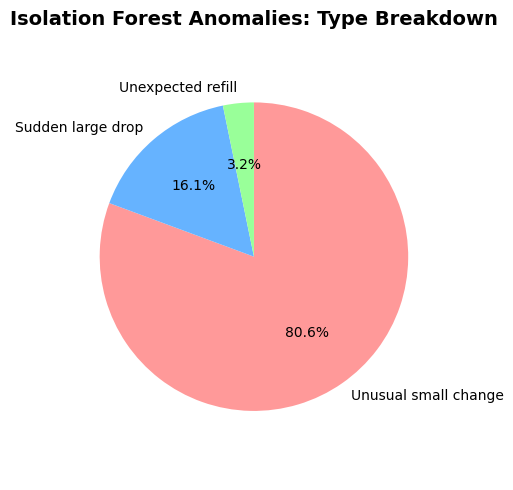

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Current Isolation Forest anomalies
anomaly_df = df[df['iso_flag'] == -1]

# Count anomaly types
type_counts = anomaly_df['anomaly_type'].value_counts()

print("Current anomaly type breakdown:")
print(type_counts)
print()

plt.figure(figsize=(5, 5))

plt.pie(type_counts.values,
        labels=type_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

plt.title('Isolation Forest Anomalies: Type Breakdown', fontsize=14, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()


In [37]:
# 1) Start with all normal
df['true_anomaly'] = 0

# 2) Business‑rule conditions for anomalies

# a) Large positive jump => refill
refill_mask = df['volume_diff'] >=  1500     # adjust threshold (L) as needed

# b) Large negative jump => sudden drop / leak
drop_mask   = df['volume_diff'] <= -1500   # adjust threshold

# c) Sensor fault: impossible volume (e.g. negative or above tank capacity)
sensor_mask = (df['Fuel Volume (L)'] < 0) | (df['Fuel Volume (L)'] > 13000)  # use your tank capacity

# d) Very noisy reading: big change but fuel level almost same
noise_mask = (df['volume_diff'].abs() >= 2000) & (df['Fuel Volume (L)'].between(0.1, 1.0))

# combine all rules
anomaly_mask = refill_mask | drop_mask | sensor_mask | noise_mask

# 3) Automatically label anomalies
df.loc[anomaly_mask, 'true_anomaly'] = 1

# Inspect counts
print(df['true_anomaly'].value_counts())


true_anomaly
0    1212
1      16
Name: count, dtype: int64


In [38]:
from sklearn.metrics import classification_report, accuracy_score

mask = df['true_anomaly'].notnull() & df['iso_flag'].notnull()

y_true = df.loc[mask, 'true_anomaly'].astype(int)
y_pred = (df.loc[mask, 'iso_flag'] == -1).astype(int)

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred,
                            target_names=['Normal', 'Anomaly']))


Accuracy: 0.9688269073010665
              precision    recall  f1-score   support

      Normal       0.99      0.97      0.98      1203
     Anomaly       0.24      0.62      0.34        16

    accuracy                           0.97      1219
   macro avg       0.62      0.80      0.66      1219
weighted avg       0.98      0.97      0.98      1219



In [39]:
true_anoms = df[df["true_anomaly"] == 1]
print("Rows labelled as anomalies by business rules:", len(true_anoms))
display(true_anoms)

Rows labelled as anomalies by business rules: 16


,id,reading,reading_time,Fuel Volume (L),volume_diff,prev_fuel_volume,iso_flag,anomaly_type,true_anomaly
206,207.0,29.17,2025-11-20 18:11:00,7370.0,1540.0,5830.0,-1.0,Unusual small change,1
207,208.0,26.84,2025-11-20 18:12:00,9360.0,1990.0,7370.0,-1.0,Unusual small change,1
232,233.0,30.73,2025-11-21 09:34:00,6040.0,-3850.0,9890.0,-1.0,Sudden large drop,1
255,256.0,36.05,2025-11-21 09:40:00,1480.0,-4190.0,5670.0,-1.0,Sudden large drop,1
259,260.0,23.62,2025-11-21 10:28:00,12130.0,12130.0,0.0,1.0,NaN,1
703,704.0,24.08,2025-11-22 12:09:00,11730.0,11730.0,0.0,1.0,NaN,1
782,783.0,23.62,2025-11-22 17:25:00,12120.0,12120.0,0.0,1.0,NaN,1
840,841.0,23.24,2025-11-23 20:20:00,12450.0,12450.0,0.0,1.0,NaN,1
888,889.0,36.08,2025-11-23 20:36:00,1460.0,-2030.0,3490.0,-1.0,Sudden large drop,1
901,902.0,23.02,2025-11-24 10:30:00,12630.0,12630.0,0.0,1.0,NaN,1


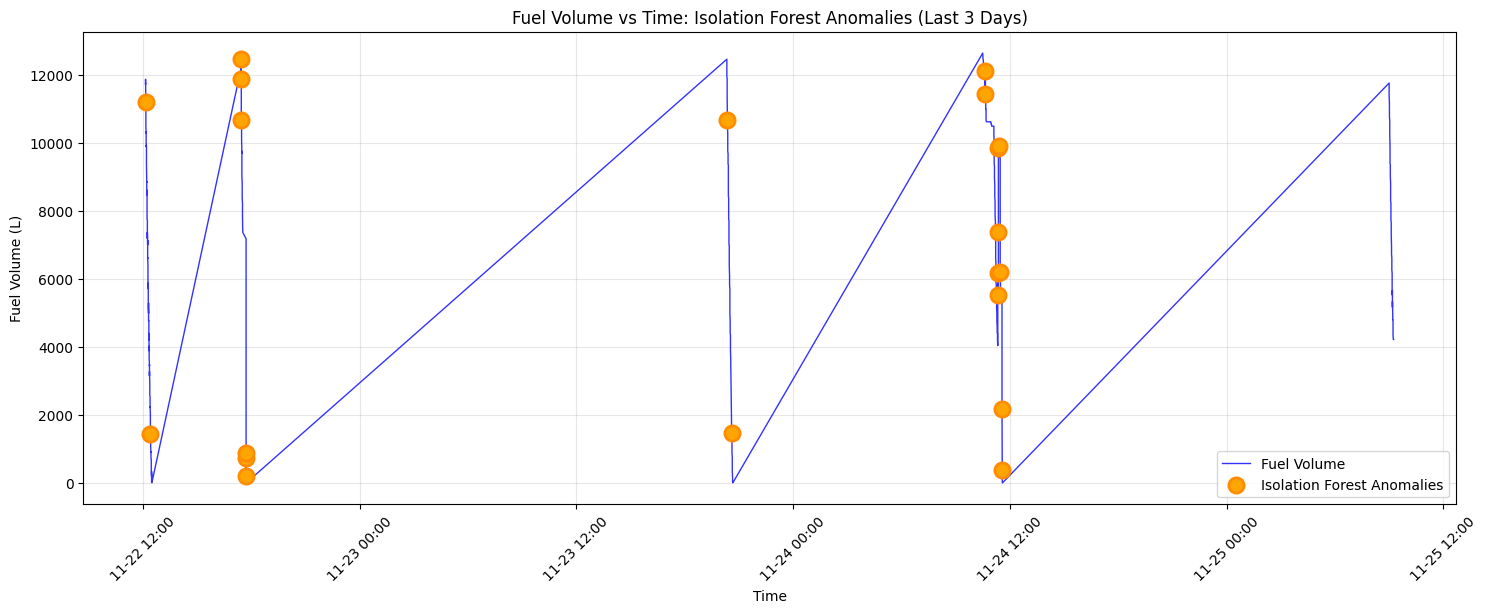

Isolation Forest anomalies (total): 42


In [40]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Filter to last 3 days only
three_days = df["reading_time"].max() - pd.Timedelta(days=3)
df_3days = df[df["reading_time"] >= three_days]

plt.figure(figsize=(15, 6))

# Full fuel volume curve
plt.plot(df_3days["reading_time"], df_3days["Fuel Volume (L)"],
         label="Fuel Volume", color="blue", linewidth=1, alpha=0.8)

# ONLY Isolation Forest anomalies
iso_anoms = df[df["iso_flag"] == -1]
iso_anoms_3days = iso_anoms[iso_anoms["reading_time"] >= three_days]

plt.scatter(iso_anoms_3days["reading_time"], iso_anoms_3days["Fuel Volume (L)"],
            color="orange", s=120, label="Isolation Forest Anomalies",
            edgecolors="darkorange", linewidth=2, zorder=5)

plt.xlabel("Time")
plt.ylabel("Fuel Volume (L)")
plt.title("Fuel Volume vs Time: Isolation Forest Anomalies (Last 3 Days)")
plt.legend()
plt.grid(alpha=0.3)

# Clean X-axis
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(DateFormatter('%m-%d %H:%M'))

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

print("Isolation Forest anomalies (total):", len(iso_anoms))

In [41]:
# Isolation Forest predictions
print("Isolation Forest anomalies (iso_flag == -1):")
print((df["iso_flag"] == -1).sum())

# Business-rule labels (for comparison)
print("Business-rule anomalies (true_anomaly == 1):")
print((df["true_anomaly"] == 1).sum())


Isolation Forest anomalies (iso_flag == -1):
42
Business-rule anomalies (true_anomaly == 1):
16


In [42]:
# Show ALL Isolation Forest anomalies
iso_anomalies = df[df["iso_flag"] == -1].copy()
print(f"Total Isolation Forest anomalies: {len(iso_anomalies)}")
print("\nIsolation Forest Detected Anomalies:")
print("=" * 80)
display(iso_anomalies[["id", "reading_time", "Fuel Volume (L)", "volume_diff", "iso_flag"]])

# If you want to export
iso_anomalies.to_csv("isolation_forest_anomalies.csv", index=False)
print(f"\nExported {len(iso_anomalies)} anomalies to isolation_forest_anomalies.csv")


Total Isolation Forest anomalies: 42

Isolation Forest Detected Anomalies:


,id,reading_time,Fuel Volume (L),volume_diff,iso_flag
33,34.0,2025-11-20 17:26:00,12100.0,560.0,-1.0
34,35.0,2025-11-20 17:26:00,11420.0,-680.0,-1.0
200,201.0,2025-11-20 18:10:00,5520.0,1490.0,-1.0
202,203.0,2025-11-20 18:10:00,6160.0,470.0,-1.0
206,207.0,2025-11-20 18:11:00,7370.0,1540.0,-1.0
207,208.0,2025-11-20 18:12:00,9360.0,1990.0,-1.0
208,209.0,2025-11-20 18:12:00,9730.0,370.0,-1.0
210,211.0,2025-11-20 18:12:00,9890.0,340.0,-1.0
232,233.0,2025-11-21 09:34:00,6040.0,-3850.0,-1.0
255,256.0,2025-11-21 09:40:00,1480.0,-4190.0,-1.0



Exported 42 anomalies to isolation_forest_anomalies.csv


In [47]:
# =========================
# Isolation Forest with Business-Rule Thresholds (±1500 L)
# =========================

from sklearn.ensemble import IsolationForest

# 1. Apply SAME thresholds as business rules to volume_diff
df["if_anomaly_flag"] = 0

# Exactly same conditions as your business rules
large_jump_mask = df["volume_diff"].abs() >= 1500  # |volume_diff| >= 1500 L
df.loc[large_jump_mask, "if_anomaly_flag"] = 1

print("Records with |volume_diff| >= 1500 L:", 
      (df["if_anomaly_flag"] == 1).sum())

# 2. Train Isolation Forest on these threshold-flagged records
X = df[["volume_diff"]].dropna()
iso = IsolationForest(
    contamination=0.03,  # half of threshold-flagged records expected to be real anomalies
    random_state=42
)
iso.fit(X)

df.loc[X.index, "iso_flag"] = iso.predict(X)

# 3. Final anomalies: threshold + Isolation Forest confirmation
final_anomalies = df[(df["if_anomaly_flag"] == 1) & (df["iso_flag"] == -1)]
print("Final Isolation Forest anomalies (±1500 L threshold):")
print(len(final_anomalies))
display(final_anomalies[["reading_time", "Fuel Volume (L)", "volume_diff"]])


Records with |volume_diff| >= 1500 L: 16
Final Isolation Forest anomalies (±1500 L threshold):
16


,reading_time,Fuel Volume (L),volume_diff
206,2025-11-20 18:11:00,7370.0,1540.0
207,2025-11-20 18:12:00,9360.0,1990.0
232,2025-11-21 09:34:00,6040.0,-3850.0
255,2025-11-21 09:40:00,1480.0,-4190.0
259,2025-11-21 10:28:00,12130.0,12130.0
703,2025-11-22 12:09:00,11730.0,11730.0
782,2025-11-22 17:25:00,12120.0,12120.0
840,2025-11-23 20:20:00,12450.0,12450.0
888,2025-11-23 20:36:00,1460.0,-2030.0
901,2025-11-24 10:30:00,12630.0,12630.0
